In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import xgboost as xgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [4]:
!unzip '/content/archive (22).zip'

Archive:  /content/archive (22).zip
  inflating: credit_risk_dataset.csv  


In [5]:
data = pd.read_csv('/content/credit_risk_dataset.csv')

In [6]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


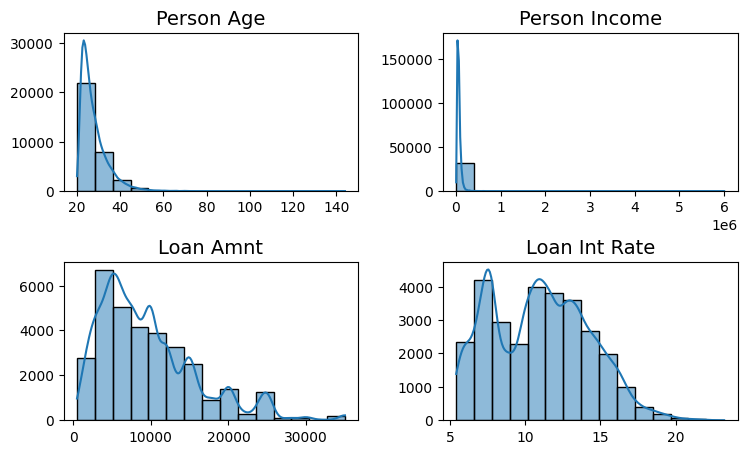

In [21]:
fig, ax = plt.subplots(2,2, figsize = (8,5))
label = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.tight_layout(pad=3.0)
for i, axes in enumerate(ax.ravel()):
    sns.histplot(data=data[label[i]], ax=axes, kde=True, bins=15)
    axes.set_title(label[i].replace('_', ' ').title(), fontsize=14)
    axes.set_xlabel('')
    axes.set_ylabel('')
plt.show()

In [36]:
loan_intent_pivot = data.pivot_table(
    index = ['loan_intent'],
    values = ['loan_amnt'],
    aggfunc = ['sum']
)
loan_intent_pivot.columns = loan_intent_pivot.columns.get_level_values(1)

In [38]:
loan_intent_pivot

,loan_amnt
loan_intent,
DEBTCONSOLIDATION,50008550
EDUCATION,61191725
HOMEIMPROVEMENT,37349675
MEDICAL,56214925
PERSONAL,52856800
VENTURE,54809625


In [46]:
warnings.filterwarnings('ignore')

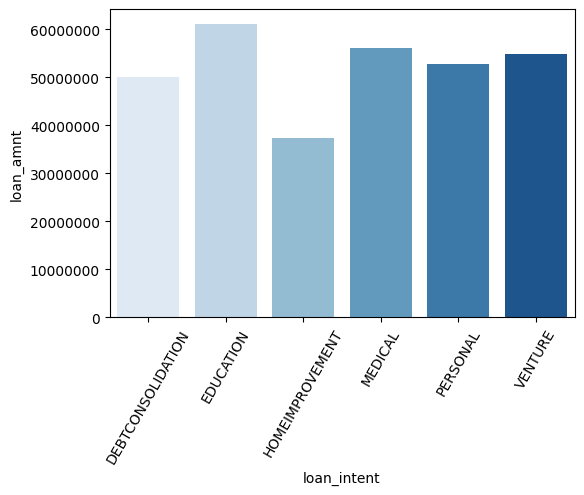

In [57]:
plt.figure(figsize=(6,4))
sns.barplot(x='loan_intent', y='loan_amnt', data=loan_intent_pivot, palette='Blues')
plt.xticks(rotation = 60)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

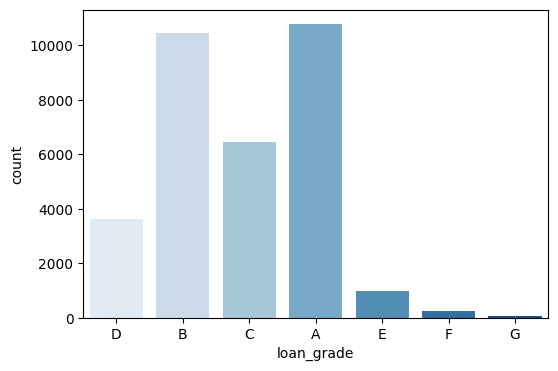

In [60]:
plt.figure(figsize = (6, 4))
sns.countplot(x = data.loan_grade, palette = 'Blues')
plt.show()

In [63]:
X = data.drop(['loan_status'], axis = 1)
y = data['loan_status']

In [65]:
X.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_percent_income,0
cb_person_default_on_file,0


In [66]:
X['loan_int_rate'] = X['loan_int_rate'].fillna(X['loan_int_rate'].median())

In [69]:
X['person_emp_length'] = X['person_emp_length'].fillna(X['person_emp_length'].median())

In [73]:
X = pd.get_dummies(X).astype(int)

In [74]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123,35000,16,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5,1000,11,0,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1,5500,12,0,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4,35000,15,0,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8,35000,14,0,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1,5800,13,0,30,1,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4,17625,7,0,19,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3,35000,10,0,28,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5,15000,11,0,26,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [79]:
std = StandardScaler()
std.fit_transform(X)

array([[-0.90337383, -0.11414329, 28.92661352, ..., -0.04436441,
        -2.16129414,  2.16129414],
       [-1.06090423, -0.91114671,  0.05676262, ..., -0.04436441,
         0.46268575, -0.46268575],
       [-0.43078263, -0.91114671, -0.92187639, ..., -0.04436441,
         0.46268575, -0.46268575],
       ...,
       [ 5.87043346,  0.16012914, -0.43255688, ..., -0.04436441,
         0.46268575, -0.46268575],
       [ 4.45265984,  1.35402091,  0.05676262, ..., -0.04436441,
         0.46268575, -0.46268575],
       [ 6.02796387, -0.38841572, -0.67721664, ..., -0.04436441,
         0.46268575, -0.46268575]])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22806, 26), (9775, 26), (22806,), (9775,))

# **1. Logistic Regression**


In [85]:
model_1_lr = LogisticRegression()
model_1_lr.fit(X_train, y_train)
ypred_model1 = model_1_lr.predict(X_test)

In [131]:
model_1_lr_result = accuracy_score(y_test,ypred_model1)
print('Accuracy for Logistic Classification model : ', model_1_lr_result*100)

Accuracy for Logistic Classification model :  80.10230179028133


# **2. Naive Bayes**

In [89]:
model_2_naive = GaussianNB()
model_2_naive.fit(X_train, y_train)
ypred_model2 = model_2_naive.predict(X_test)

In [130]:
model_1_naive_result = accuracy_score(y_test,ypred_model2)
print('Accuracy for Naive Bayes model : ', model_1_naive_result*100)

Accuracy for Naive Bayes model :  81.06393861892583


# **3. MultinomialNB**


In [93]:
model_3_MNB = MultinomialNB()
model_3_MNB.fit(X_train, y_train)
ypred_model3 = model_3_MNB.predict(X_test)

In [129]:
model_3_naive_result = accuracy_score(y_test,ypred_model3)
print('Accuracy for Naive Bayes MultiNomialNB model : ', model_3_naive_result*100)

Accuracy for Naive Bayes MultiNomialNB model :  65.85166240409207


# **4. BernoulliNB**

In [102]:
model_4_BNB = BernoulliNB()
model_4_BNB.fit(X_train, y_train)
ypred_model4 = model_4_BNB.predict(X_test)

In [128]:
model_4_naive_result = accuracy_score(y_test,ypred_model4)
print('Accuracy for Naive Bayes Bernoil model : ', model_4_naive_result*100)

Accuracy for Naive Bayes Bernoil model :  79.32480818414322


# **5. K-Nearest Neighbors (KNN)**

In [104]:
model_5_knn = KNeighborsClassifier(5)
model_5_knn.fit(X_train, y_train)
ypred_model5 = model_5_knn.predict(X_test)

In [127]:
model_5_knn_result = accuracy_score(y_test, ypred_model5)
print('Accuracy for KNN model : ', model_5_knn_result*100)

Accuracy for KNN model :  83.07928388746804


# **6. Support Vector Machines (SVM)**

In [108]:
model_6_svm = SVC()
model_6_svm.fit(X_train, y_train)
ypred_model6 = model_6_svm.predict(X_test)

In [126]:
model_6_svm_result = accuracy_score(y_test, ypred_model6)
print('Accuracy for SVM model : ', model_6_svm_result*100)

Accuracy for SVM model :  79.26342710997443


# **7.Decision Trees**

In [113]:
model_7_clf = DecisionTreeClassifier()
model_7_clf.fit(X_train, y_train)
ypred_model7 = model_7_clf.predict(X_test)

In [125]:
model_7_clf_result = accuracy_score(y_test, ypred_model7)
print('Accuracy for CLF model : ', model_7_clf_result*100)

Accuracy for CLF model :  88.45012787723785


# **8. RandomGrid Decision Tree**

In [116]:
model_8_clf = DecisionTreeClassifier()
param_distributions = {
    'criterion' : ['log_loss','entropy','gini'],
    'max_depth' : [2, 3, 5, 7, 9],
    'max_leaf_nodes' : [2, 3, 5, 7, 9]
}
random_model8 = RandomizedSearchCV(model_8_clf,
                                   param_distributions,
                                   n_iter = 10,
                                   cv = 4)
random_model8.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['log_loss', 'entropy',
                                                      'gini'],
                                        'max_depth': [2, 3, 5, 7, 9],
                                        'max_leaf_nodes': [2, 3, 5, 7, 9]})

In [120]:
model_8_params = random_model8.best_params_

In [119]:
random_model8.best_score_

0.8529771048185102

In [122]:
model8 = DecisionTreeClassifier(**model_8_params)
model8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9)

In [124]:
ypred_model8 = model8.predict(X_test)
model_8_result = accuracy_score(y_test, ypred_model8)
print('Accuracy for CLF Randomized Model : ', model_8_result*100)

Accuracy for CLF Randomized Model :  85.49360613810741


# **9.Random Forest**


In [132]:
model_9_ran = RandomForestClassifier()
model_9_ran.fit(X_train, y_train)
ypred_model9 = model_9_ran.predict(X_test)

In [133]:
model_9_ran_result = accuracy_score(y_test, ypred_model9)
print('Accuracy for Random Forest Model : ', model_9_ran_result*100)

Accuracy for Random Forest Model :  92.18414322250639


# **10. Random Forest Randomized**

In [134]:
model_10_ran = RandomForestClassifier()
param_distributions = {
    'n_estimators' : [100, 200, 300, 500, 700],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 3, 5, 7, 9],
    'max_features' : ['sqrt', 'log2', None],
    'max_leaf_nodes' : [2, 3, 5, 7, 9]
}
random_model10 = RandomizedSearchCV(model_10_ran,
                                   param_distributions,
                                   n_iter = 10,
                                   cv = 4)
random_model10.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 7, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [2, 3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700]})

In [135]:
model_10_params = random_model10.best_params_

In [136]:
random_model10.best_score_

0.8371041272765563

In [138]:
model10 = RandomForestClassifier(**model_10_params)
model10.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=7)

In [139]:
ypred_model10 = model10.predict(X_test)
model_10_result = accuracy_score(y_test, ypred_model10)
print('Accuracy for Random Randomized Model : ', model_10_result*100)

Accuracy for Random Randomized Model :  84.07161125319693


# **11. Gradient Boosting Machines (GBM)**

In [140]:
model_11_GBC = GradientBoostingClassifier()
model_11_GBC.fit(X_train, y_train)
ypred_model11 = model_11_GBC.predict(X_test)
model_11_result = accuracy_score(y_test, ypred_model11)
print('Accuracy for the GradientBoostingClassifier : ', model_11_result*100)

Accuracy for the GradientBoostingClassifier :  91.0690537084399


# **12. XGBoost**

In [142]:
!pip install xgboost

In [143]:
model_12_XGB = XGBClassifier()
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
random_model12 = RandomizedSearchCV(model_12_XGB,
                                    param_distributions,
                                    n_iter = 10,
                                    cv = 4)
random_model12.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]})

In [144]:
random_model12.best_score_

0.9303251101866908

In [146]:
model12_best_estimator = random_model12.best_estimator_

In [149]:
model12_ypred = model12_best_estimator.predict(X_test)
model12_result = accuracy_score(y_test, model12_ypred)
print("Accuracy for XGBoost : ", model12_result)

Accuracy for XGBoost :  0.9307416879795396


# **13. CatBoost (Categorical Boosting)**

In [152]:
!pip install catboost
model_13_cat = CatBoostClassifier()
param_distributions = {
    'iterations' : [100, 200, 300, 500, 700, 1000],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.05, 0.1],
    'depth':[2, 3, 5, 7, 9]
}
random_model13 = RandomizedSearchCV(model_13_cat,
                                    param_distributions,
                                    n_iter = 10,
                                    cv = 4)
random_model13.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6531789	total: 7.93ms	remaining: 7.92s
1:	learn: 0.6179063	total: 17.4ms	remaining: 8.69s
2:	learn: 0.5859478	total: 35.6ms	remaining: 11.8s
3:	learn: 0.5565460	total: 43.4ms	remaining: 10.8s
4:	learn: 0.5298573	total: 51.3ms	remaining: 10.2s
5:	learn: 0.5068919	total: 59.3ms	remaining: 9.83s
6:	learn: 0.4872164	total: 67.5ms	remaining: 9.57s
7:	learn: 0.4686241	total: 75.6ms	remaining: 9.38s
8:	learn: 0.4529613	total: 84.2ms	remaining: 9.27s
9:	learn: 0.4389870	total: 92.5ms	remaining: 9.15s
10:	learn: 0.4264790	total: 101ms	remaining: 9.06s
11:	learn: 0.4157331	total: 109ms	remaining: 8.97s
12:	learn: 0.4072117	total: 117ms	remaining: 8.88s
13:	learn: 0.3970806	total: 125ms	remaining: 8.83s
14:	learn: 0.3877830	total: 134ms	remaining: 8.78s
15:	learn: 0.3808547	total: 142ms	remaining: 8.75s
16:	learn: 0.3730637	total: 151ms	remaining: 8.7s
17:	learn: 0.3667899	total: 159ms	remaining: 8.66s
18:	learn: 0.3598233	total: 167m

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostClassifier object at 0x79492587a380>,
                   param_distributions={'depth': [2, 3, 5, 7, 9],
                                        'iterations': [100, 200, 300, 500, 700,
                                                       1000],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1]})

In [153]:
random_model13.best_score_

0.9319476325511884

In [154]:
model_13 = random_model13.best_estimator_

In [157]:
model13_ypred = model_13.predict(X_test)
model13_result = accuracy_score(y_test, model13_ypred)
print("Accuracy of the CatBoost : ", model13_result*100)

Accuracy of the CatBoost :  93.00255754475704


In [163]:
resulted_df = {
    'model' : ['logistic Regression', 'Naive Bayes', 'MultiNormialNB', 'BeronoulliNB', 'KNN', 'SVM', 'Decision Tree', 'Random Decision Tree', 'Random Tree Classifer', 'Randomized Random Tree Classifer', 'GBM', 'XGBoost', 'CatBoost'],
    'result' : [model_1_lr_result, model_1_naive_result, model_3_naive_result, model_4_naive_result, model_5_knn_result, model_6_svm_result, model_7_clf_result,model_8_result, model_9_ran_result,
              model_10_result, model_11_result, model12_result, model13_result]
}

In [174]:
dataframe = pd.DataFrame(resulted_df)
dataframe

,model,result
0,logistic Regression,0.801023
1,Naive Bayes,0.810639
2,MultiNormialNB,0.658517
3,BeronoulliNB,0.793248
4,KNN,0.830793
5,SVM,0.792634
6,Decision Tree,0.884501
7,Random Decision Tree,0.854936
8,Random Tree Classifer,0.921841
9,Randomized Random Tree Classifer,0.840716


In [175]:
dataframe_sorted = dataframe.sort_values(by='result', ascending=True)
dataframe_sorted['result'] = dataframe_sorted['result'] * 100
dataframe_sorted = dataframe_sorted.reset_index(drop=True)
dataframe_sorted

,model,result
0,MultiNormialNB,65.851662
1,SVM,79.263427
2,BeronoulliNB,79.324808
3,logistic Regression,80.102302
4,Naive Bayes,81.063939
5,KNN,83.079284
6,Randomized Random Tree Classifer,84.071611
7,Random Decision Tree,85.493606
8,Decision Tree,88.450128
9,GBM,91.069054
